# **Exploratory Data Analysis**

---

## Executive Summary of Project: Grocery Store Reviews Analysis
Our project aims to analyze Yelp reviews and ratings of grocery stores to uncover key factors influencing customer satisfaction and business performance. By leveraging machine learning and unstructured data analytics, we will extract actionable insights to help grocery store managers optimize customer experience, marketing strategies, and operational efficiency.

## Data Sources & Filtering Criteria
- We have compiled publicly available Yelp data, including:

- To ensure relevant analysis, we filtered and selected reviews specifically from grocery stores such as Target, Fry’s, Safeway, and Trader Joe’s within Arizona State. This approach allows us to gain localized insights into customer preferences, service quality, and areas for improvement.

----

In [ ]:
!pip install textblob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Load the dataset
df = pd.read_csv(r'C:\Users\vasuk\Downloads\Yelp-JSON\Yelp JSON\yelp_dataset\Grocery_Store_Arizona .csv')

In [ ]:
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,business_stars,review_count,...,review_stars,useful,funny,cool,review_text,review_date,checkin_dates,tokenized_review,total_votes,sentiment_score
0,VmcuFXUrXInZat40t-IbDg,Target,4040 N Oracle Rd,Tucson,AZ,85705,32.27986,-110.97700,3.5,84,...,2,2,2,0,"Store is clean, but the layout is confusing an...",2014-05-25 23:56:00,"2010-07-03 20:32:11, 2010-07-12 19:50:28, 2010...","[Store, is, clean,, but, the, layout, is, conf...",4,-0.063228
1,OOoxH_7PHboLOZjvLKmt7g,Target,3699 E Broadway Blvd,Tucson,AZ,85716,32.22347,-110.91459,3.5,57,...,4,0,0,0,Target has higher prices than some other store...,2012-01-02 23:16:00,"2010-07-26 22:30:02, 2010-08-22 22:03:48, 2010...","[Target, has, higher, prices, than, some, othe...",0,0.156223
2,VmcuFXUrXInZat40t-IbDg,Target,4040 N Oracle Rd,Tucson,AZ,85705,32.27986,-110.97700,3.5,84,...,4,1,0,0,"Yesterday, I found out that I had company comi...",2011-01-11 17:45:00,"2010-07-03 20:32:11, 2010-07-12 19:50:28, 2010...","[Yesterday,, I, found, out, that, I, had, comp...",1,0.196094
3,VmcuFXUrXInZat40t-IbDg,Target,4040 N Oracle Rd,Tucson,AZ,85705,32.27986,-110.97700,3.5,84,...,3,0,0,0,This target is nice enough. They have a pharm...,2018-11-05 00:03:00,"2010-07-03 20:32:11, 2010-07-12 19:50:28, 2010...","[This, target, is, nice, enough., They, have, ...",0,0.362222
4,WqtHd0x6Eay-huMDIws86w,Target,10555 N Oracle Rd,Oro Valley,AZ,85737,32.39916,-110.95900,3.5,24,...,2,1,1,0,It is now time to lower my previous review to ...,2019-08-14 02:47:00,"2010-08-01 01:29:14, 2010-08-04 02:38:02, 2010...","[It, is, now, time, to, lower, my, previous, r...",2,0.003784


In [ ]:
# Display basic information about the dataset
print("Dataset Overview:\n", df.info())
print("\nFirst 5 rows:\n", df.head())
# Column Latitude, longitude, and review_date are in the wrong datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   business_id     8000 non-null   object 
 1   name            8000 non-null   object 
 2   address         8000 non-null   object 
 3   city            8000 non-null   object 
 4   state           8000 non-null   object 
 5   postal_code     8000 non-null   int64  
 6   latitude        8000 non-null   float64
 7   longitude       8000 non-null   float64
 8   business_stars  8000 non-null   float64
 9   review_count    8000 non-null   int64  
 10  is_open         8000 non-null   int64  
 11  attributes      7990 non-null   object 
 12  categories      8000 non-null   object 
 13  hours           7936 non-null   object 
 14  review_id       8000 non-null   object 
 15  review_user_id  8000 non-null   object 
 16  review_stars    8000 non-null   int64  
 17  useful          8000 non-null   i

In [ ]:
# Convert latitude and longitude to float (if they are not already)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert review_date to datetime format
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

C:\Users\vasuk\AppData\Local\Temp\ipykernel_1344\3931661586.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')


In [ ]:
df.isnull().sum()
# Attributes and hours columns have missing values.

business_id          0
name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
business_stars       0
review_count         0
is_open              0
attributes          10
categories           0
hours               64
review_id            0
review_user_id       0
review_stars         0
useful               0
funny                0
cool                 0
review_text          0
review_date          0
checkin_dates        0
tokenized_review     0
total_votes          0
sentiment_score      0
dtype: int64

In [ ]:
df.duplicated().sum()
# There are 6372 duplicated values

6372

----

# Summary Statistics of the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and continuous columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude non-relevant categorical columns (IDs and text data)
excluded_categorical = ['business_id', 'review_id', 'review_text', 'review_user_id', 'checkin_dates', 'attributes', 'categories', 'hours']
categorical_columns = [col for col in categorical_columns if col not in excluded_categorical]

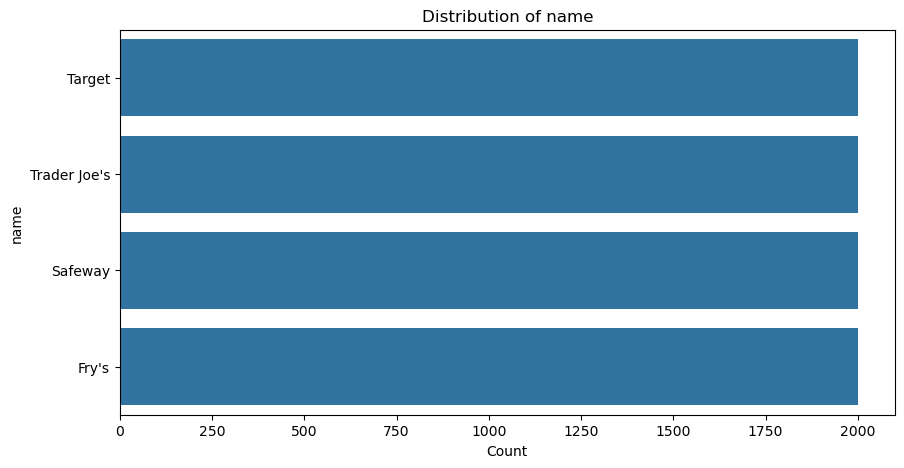

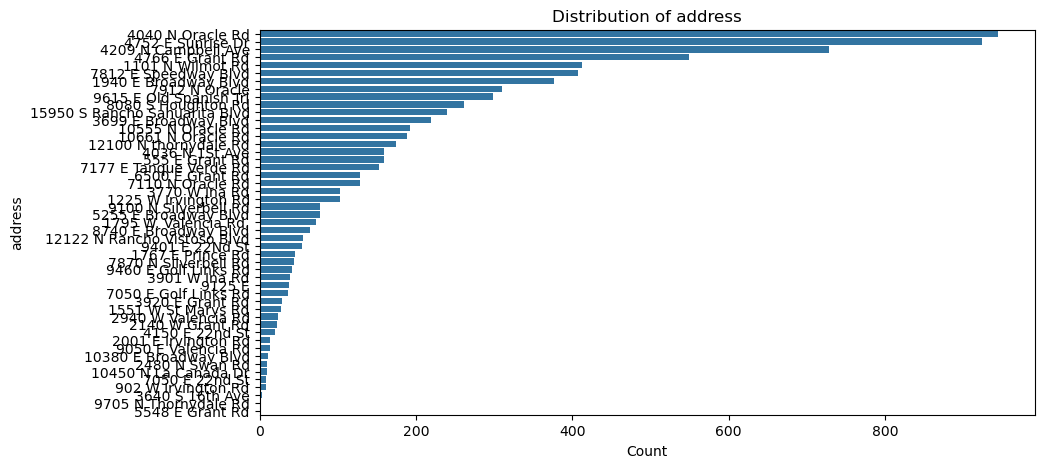

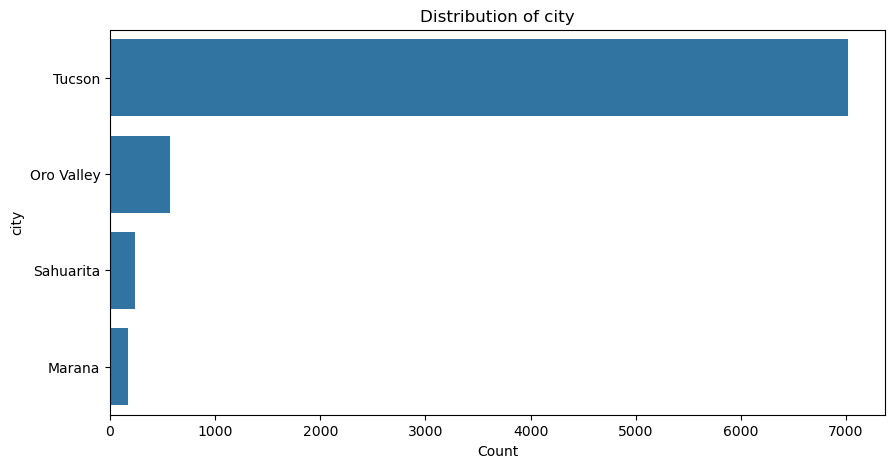

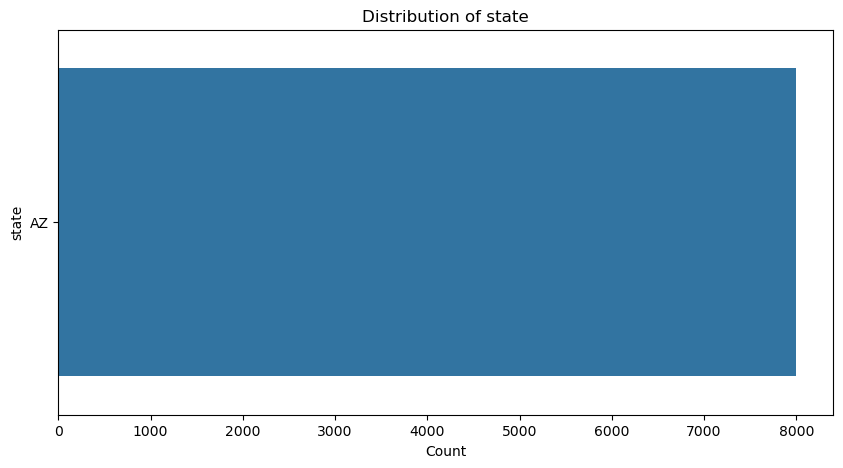

In [ ]:
# Plot histograms for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()
# All categorical columns are intact.

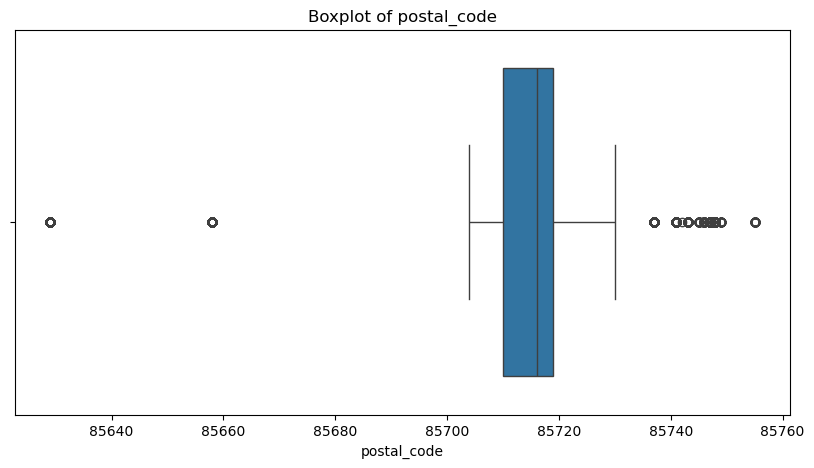

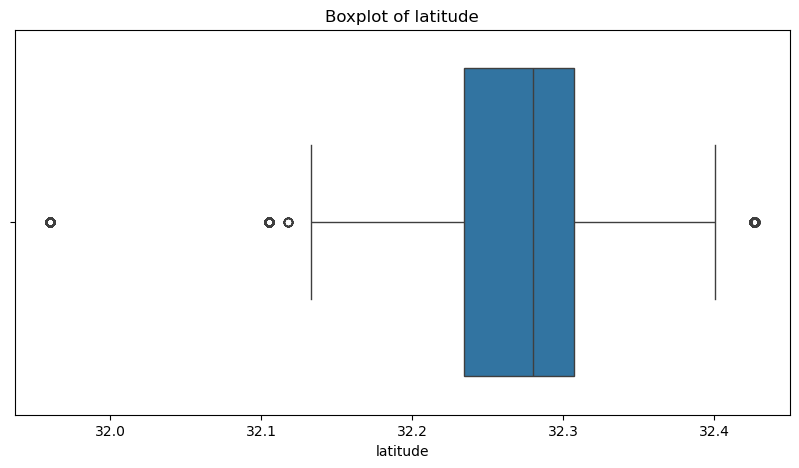

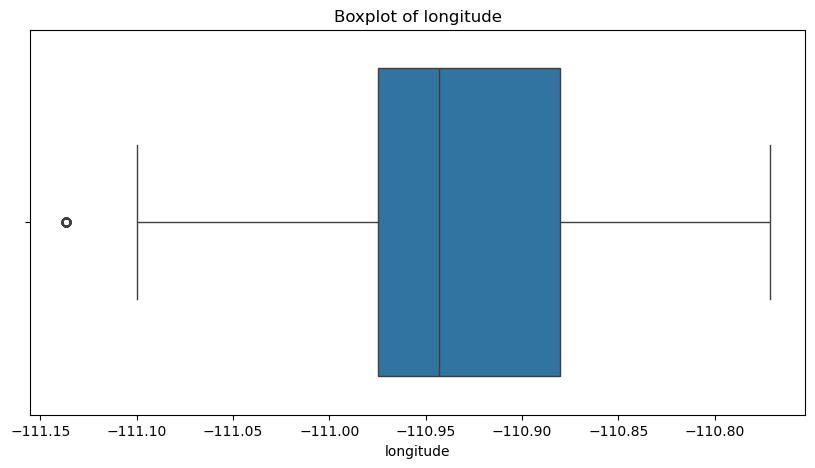

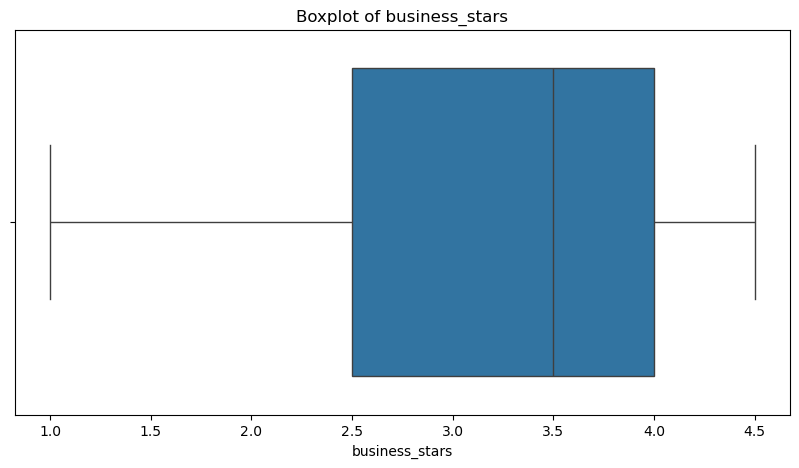

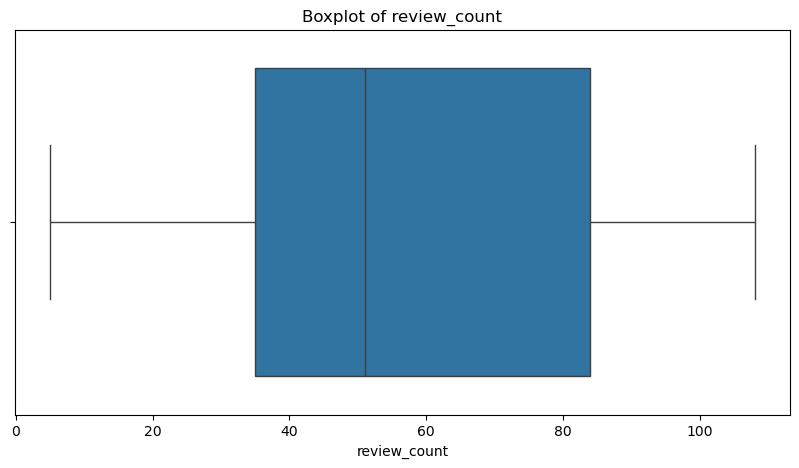

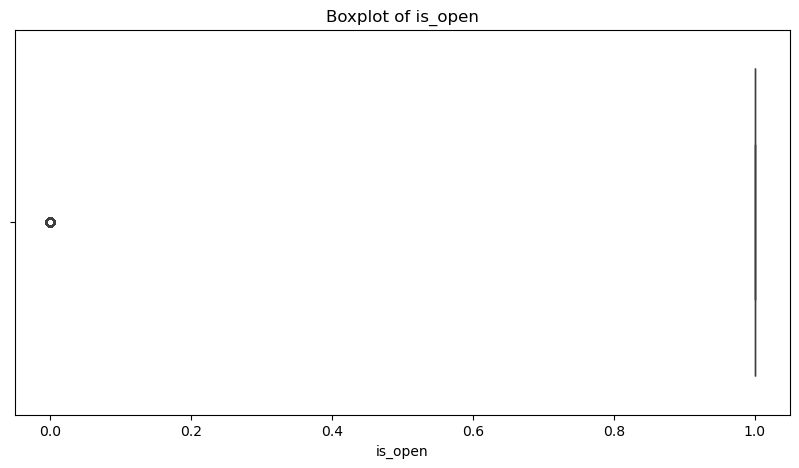

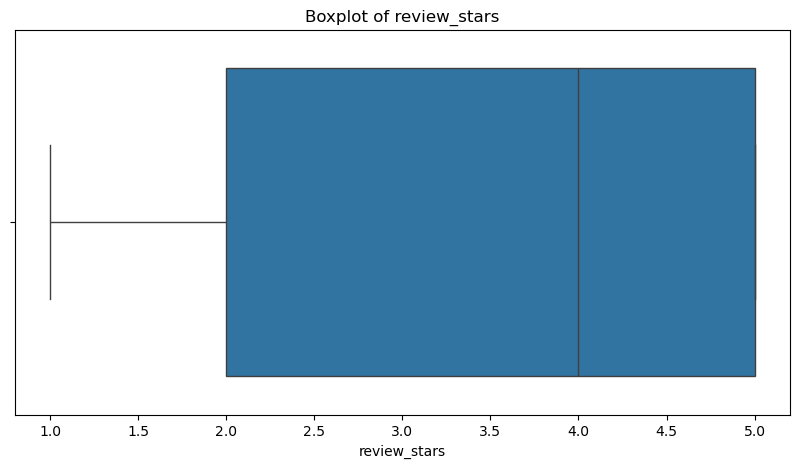

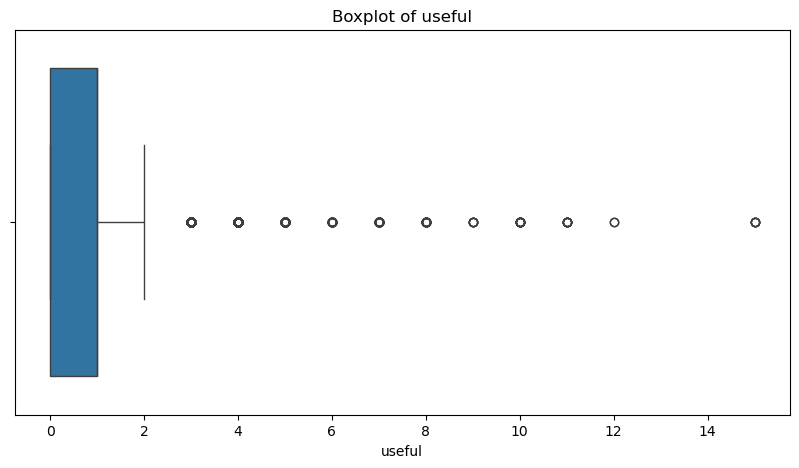

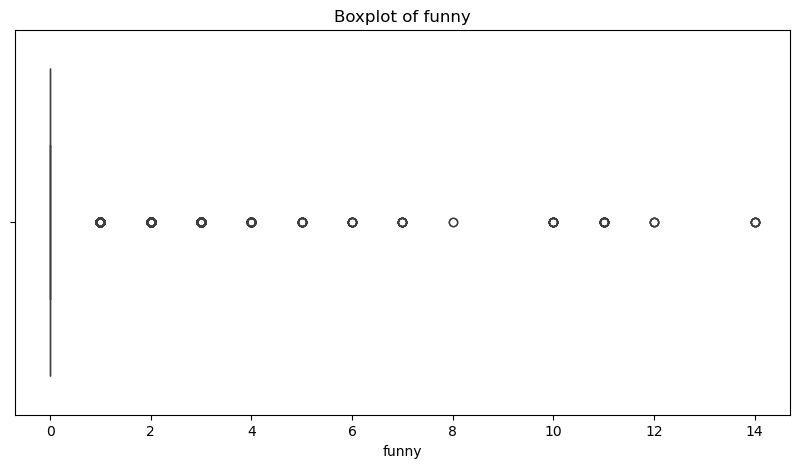

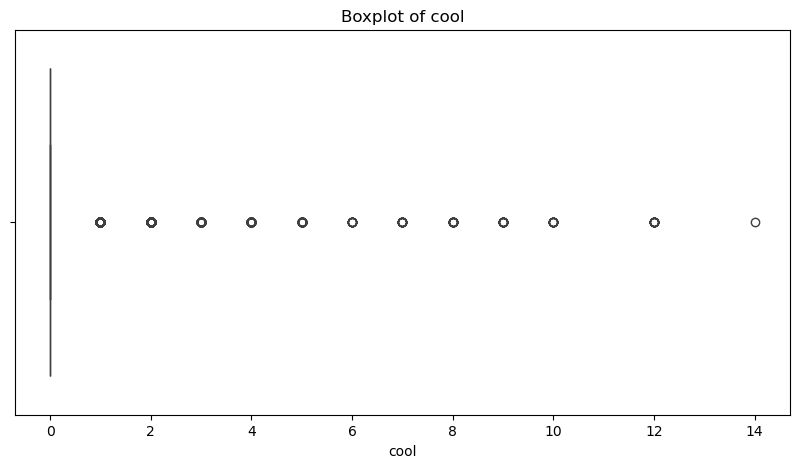

In [ ]:
# Plot boxplots for continuous columns to check for outliers
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()
# Data has outliers

In [ ]:
# Basic statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
                    business_id    name           address    city state  \
count                     8000    8000              8000    8000  8000   
unique                      49       4                49       4     1   
top     VmcuFXUrXInZat40t-IbDg  Target  4040 N Oracle Rd  Tucson    AZ   
freq                       944    2000               944    7020  8000   
mean                       NaN     NaN               NaN     NaN   NaN   
std                        NaN     NaN               NaN     NaN   NaN   
min                        NaN     NaN               NaN     NaN   NaN   
25%                        NaN     NaN               NaN     NaN   NaN   
50%                        NaN     NaN               NaN     NaN   NaN   
75%                        NaN     NaN               NaN     NaN   NaN   
max                        NaN     NaN               NaN     NaN   NaN   

         postal_code     latitude    longitude  business_stars  review_count  \
count    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

# Ensure 'review_text' is a string
df['review_text'] = df['review_text'].astype(str)

# Number of reviews
num_reviews = df.shape[0]

# Tokenizing the review text
df['tokenized_review'] = df['review_text'].apply(lambda x: x.split())

# Total number of tokens (words)
total_tokens = sum(df['tokenized_review'].apply(len))

# Number of unique words (vocabulary size)
unique_words = set(word for review in df['tokenized_review'] for word in review)
vocabulary_size = len(unique_words)

# Average review length (words per review)
average_review_length = total_tokens / num_reviews

# Number of unique customers
num_unique_customers = df['review_user_id'].nunique()

# Number of unique businesses
num_unique_businesses = df['business_id'].nunique()

# Number of unique regions (cities)
num_unique_regions = df['city'].nunique()

# Average stars per review
avg_stars_per_review = df['business_stars'].mean()

# Average votes per review (sum of useful, funny, and cool votes)
df['total_votes'] = df[['useful', 'funny', 'cool']].sum(axis=1)
avg_votes_per_review = df['total_votes'].mean()

# Create summary statistics dataframe
summary_stats = pd.DataFrame({
    "Metric": [
        "Number of Reviews",
        "Total Tokens",
        "Vocabulary Size",
        "Average Review Length",
        "Unique Customers",
        "Unique Businesses",
        "Unique Regions",
        "Average Stars per Review",
        "Average Votes per Review"
    ],
    "Value": [
        num_reviews,
        total_tokens,
        vocabulary_size,
        average_review_length,
        num_unique_customers,
        num_unique_businesses,
        num_unique_regions,
        avg_stars_per_review,
        avg_votes_per_review
    ]
})

# Display the summary statistics
print(summary_stats)

                     Metric          Value
0         Number of Reviews    8000.000000
1              Total Tokens  814933.000000
2           Vocabulary Size   17448.000000
3     Average Review Length     101.866625
4          Unique Customers    1142.000000
5         Unique Businesses      49.000000
6            Unique Regions       4.000000
7  Average Stars per Review       3.295562
8  Average Votes per Review       1.764250


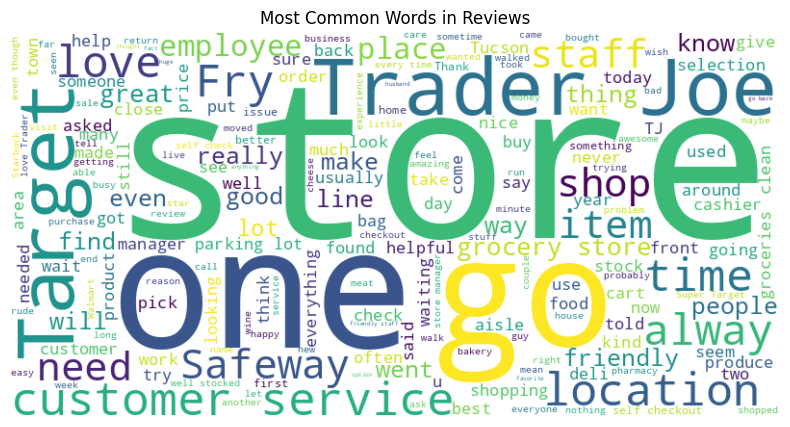

In [ ]:
# Word Cloud for most common words in reviews
text = ' '.join(df['review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

---

## **Data Evaluation**

## (a) Suitability of the Selected Data for Business Questions  
The dataset includes detailed reviews, customer interactions, business information, and location details. This makes it useful for answering business questions about customer satisfaction, performance, and regional preferences. Specifically:  
- Customer Behavior Analysis: The review texts, star ratings, and votes (useful, funny, cool) allow in-depth analysis of customer feelings. This helps businesses understand how satisfied customers are and where they can improve.  
- Business Performance Evaluation: The dataset features business names, star ratings, and review counts, giving insights into how businesses perform based on customer feedback.  
- Geographical Insights: The dataset covers various cities and regions, helping businesses find performance trends and regional preferences.  
- User Engagement Trends: The dataset tracks review dates, check-in dates, and review counts, which help analyze trends in customer visits and engagement over time.  
Overall, this dataset is very suitable for gaining insights related to customer satisfaction, business performance, and regional trends.  

## (b) Sample Size Appropriateness  
The dataset includes 8,000 reviews, which is a solid sample size for analysis. We chose 8,000 rows to process the data easily and to gain a clear overview of the analysis. This size allows us to run efficient calculations while still capturing important insights.

This sample size is suitable for understanding customer feelings and business performance across different locations. However, if certain businesses or regions have fewer reviews, it could limit how well we can generalize findings for those specific cases.

## (c) Potential Biases in the Data  
Even though the dataset is useful, it may have biases in several ways:  
- Review Bias: People who leave reviews often have strong opinions, either very positive or very negative. This can lead to an overrepresentation of unhappy or very happy customers, while neutral comments may be missing.  
- Geographical Bias: The dataset focuses on specific locations (e.g., Arizona), which might not represent customer behavior in other states or regions.  
- Business Selection Bias: It may mainly include larger or more popular grocery stores, leaving smaller, less-reviewed stores less visible.  
- Time-Based Bias: If the data isn’t evenly spread over time, some businesses might look better or worse due to seasonal changes or outside events.  
- Fake/Influenced Reviews: Some businesses may try to boost their ratings by encouraging positive feedback, which can lead to inflated ratings.  

## (d) Potential Challenges in Processing the Data  
There are several challenges when working with this dataset:  
- Text Data Complexity: Review text needs cleaning and organizing (like removing common words and breaking them into parts) to get clear insights. Variations in language and slang can make sentiment analysis harder.  
- Data Cleaning Issues: Some areas may have missing data, which needs filling in or removing. Inconsistent formats (like review dates) may need fixing. Duplicate or spam reviews can confuse the analysis.  
- Outlier Management: The data shows outliers in star ratings, votes, and review counts, which can skew results. Proper methods (like changing data distributions) may be necessary to address this.  
- Regional and Business Distributions: Some businesses or regions might have too few reviews, making it difficult to draw broad conclusions. Normalization techniques (like weighting reviews) may help with fair comparisons.  

C:\Users\vasuk\AppData\Local\Temp\ipykernel_1344\2558814638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['review_stars'], palette='viridis')


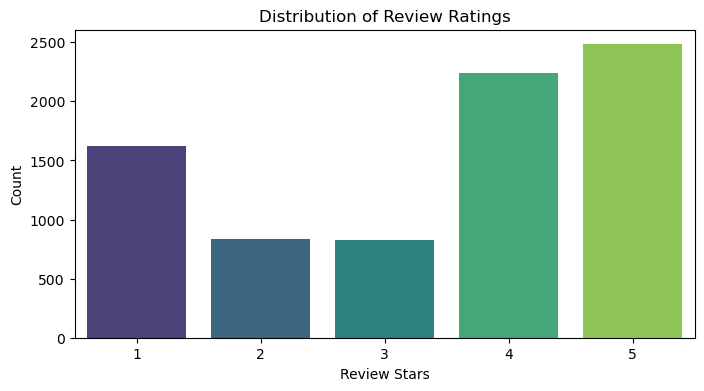

In [ ]:
# Distribution of Review Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x=df['review_stars'], palette='viridis')
plt.title("Distribution of Review Ratings")
plt.xlabel("Review Stars")
plt.ylabel("Count")
plt.show()

---

# **Preliminary Data Exploration**

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

In [ ]:
# Download NLTK stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [ ]:
# Apply preprocessing
df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

In [ ]:
# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['sentiment_score'] = df['review_text'].apply(get_sentiment)

In [ ]:
df['subjectivity'] = df['cleaned_review_text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [ ]:
# Classify sentiment based on polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

In [ ]:
# Display sentiment analysis results
sentiment_summary = df[['review_text', 'sentiment_score', 'subjectivity', 'sentiment']].head(10)
display(sentiment_summary)  # Display in Jupyter Notebook

,review_text,sentiment_score,subjectivity,sentiment
0,"Store is clean, but the layout is confusing an...",-0.063228,0.279545,Negative
1,Target has higher prices than some other store...,0.156223,0.552354,Positive
2,"Yesterday, I found out that I had company comi...",0.196094,0.518750,Positive
3,This target is nice enough. They have a pharm...,0.362222,0.621164,Positive
4,It is now time to lower my previous review to ...,0.003784,0.576858,Positive
5,I love how clean and nice the staff is. I love...,0.466667,0.720000,Positive
6,"Big clean store , big parking , big isles , b...",0.069615,0.327778,Positive
7,I honestly have found so many great deals for ...,0.580000,0.730000,Positive
8,Just want to give a HUGE shout out to Yvette! ...,0.424306,0.694444,Positive
9,"Went there for party decor, the isles were emp...",0.133333,0.575000,Positive


C:\Users\vasuk\AppData\Local\Temp\ipykernel_1344\3476471073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


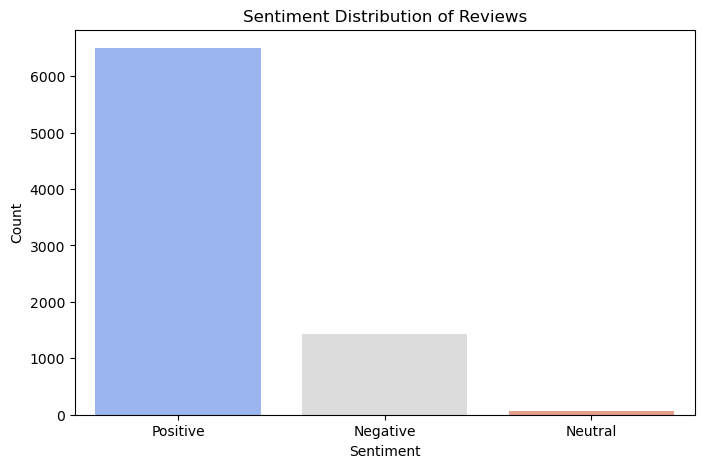

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Generate word clouds for positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['cleaned_review_text'])
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['cleaned_review_text'])

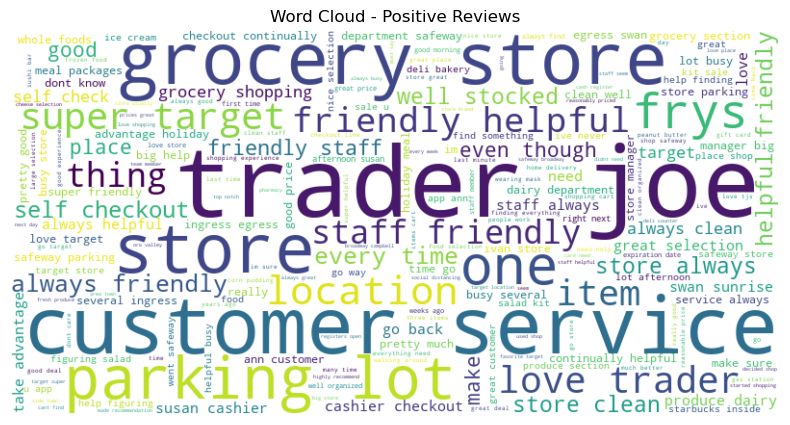

In [ ]:
# Positive Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

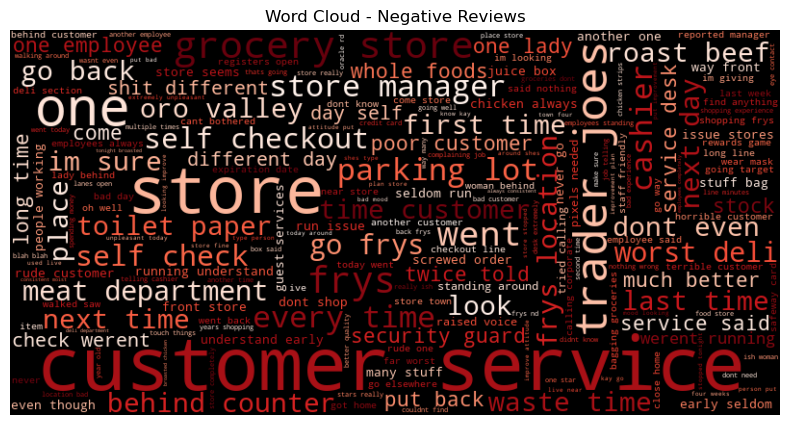

In [ ]:
# Negative Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()

In [ ]:
# Sentiment trend over time
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')  # Ensure correct datetime format
sentiment_trend = df.groupby(df['review_date'].dt.to_period("M"))['sentiment_score'].mean()

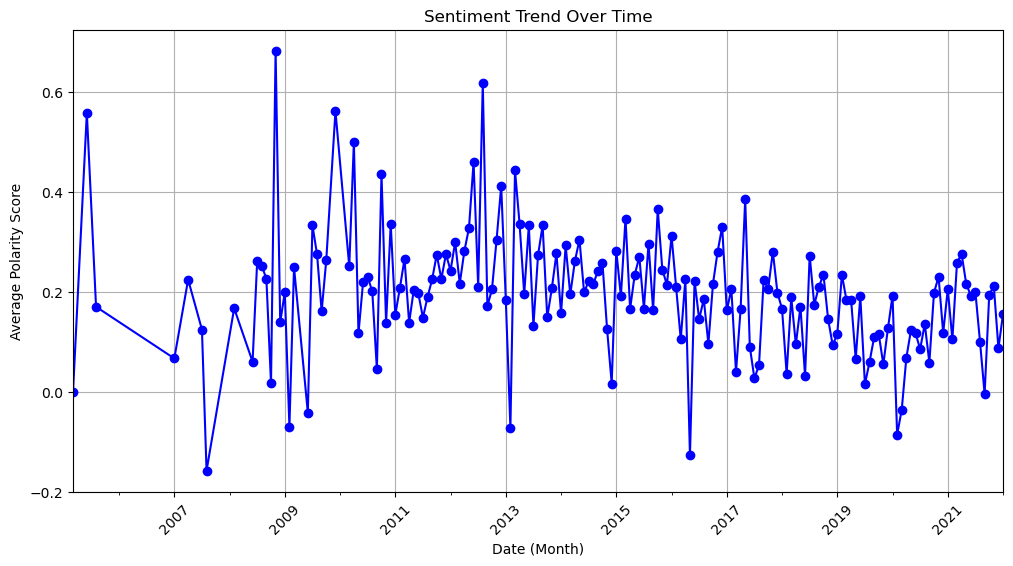

In [ ]:
plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", linestyle="-", color="blue")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date (Month)")
plt.ylabel("Average Polarity Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

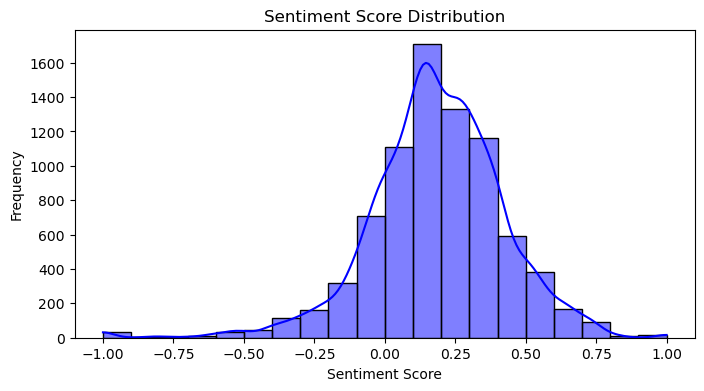

In [ ]:
# Sentiment distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='blue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Data quality evaluation
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values[missing_values > 0])


Missing Values per Column:
 attributes    10
hours         64
dtype: int64


In [ ]:
print("\nData Quality Observations:")
print("- The dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")
print("- Sentiment analysis shows a general polarity distribution among reviews.")


Data Quality Observations:
- The dataset contains 8000 rows and 26 columns.
- Sentiment analysis shows a general polarity distribution among reviews.


# Proposed Solution

To analyze the dataset and gain useful business insights, I suggest using a mix of machine learning models and techniques for analyzing unstructured data. This will help us understand customer sentiment, predict trends, and make better business decisions. Here’s how we can approach this:

## 1. Machine Learning Models for Sentiment Classification
   We will use supervised machine learning methods to categorize reviews as Positive, Neutral, or Negative based on text features.
   
### Traditional ML Models:  
- Logistic Regression: A simple and effective starting model for sentiment classification, suitable for features extracted using TF-IDF or Bag-of-Words.
- Support Vector Machine (SVM): Good for text classification in high-dimensional spaces, and works well with TF-IDF data.
- Random Forest: Helps analyze which features are important for determining sentiment and is robust against noisy data.
- Multilayer Perceptron (MLP - Neural Network): Can learn complex patterns in text data and performs well when trained on word embeddings like Word2Vec or GloVe.

## 2. Deep Learning Approaches
- Recurrent Neural Networks (RNN) / LSTM:
     LSTM (Long Short-Term Memory) is effective for sentiment analysis because it maintains the context of words in a sequence. It works well wit pre-trained embeddings like GloVe or FastText.
- Transformer-Based Models (BERT, DistilBERT):
     BERT (Bidirectional Encoder Representations from Transformers) is currently very effective for text classification and sentiment analysis. Fine-tuning BERT on customer reviews can lead to high accuracy in detecting sentiment.

## 3. Unstructured Data Analytics Techniques  
- Text Preprocessing:
     This includes breaking down text into individual words, reducing words to their base form, and removing common words, punctuation, numbers, and special characters.
- Feature Extraction:
     We’ll use TF-IDF (Term Frequency-Inverse Document Frequency) to determine keyword importance, Bag-of-Words as a basic representation, and Word2Vec or GloVe embeddings for deep learning models.
- Topic Modeling (Latent Dirichlet Allocation - LDA):  
     This helps us identify the main topics in customer reviews, giving businesses insight into what customers frequently talk about.
- Named Entity Recognition (NER):  
     This identifies entities such as business names, locations, product mentions, and staff names in reviews. It assists in analyzing customer feedback on specific topics.
- Sentiment Trend Analysis:
     We will track sentiment changes over time to spot trends, helping businesses monitor improvements or declines in service.

## 4. Predictive Analytics for Customer Satisfaction
We will use regression models (like Linear Regression and XGBoost) to predict business star ratings based on review sentiment. We will also build churn prediction models to estimate whether a customer is likely to keep visiting or stop coming to a business.

----